<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [2]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [3]:
image = np.array(Image.open('lemon.jpeg'))

(100, 100, 3)


## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





In [4]:
#prints image shape
print(image.shape)

(100, 100, 3)


(100, 100)


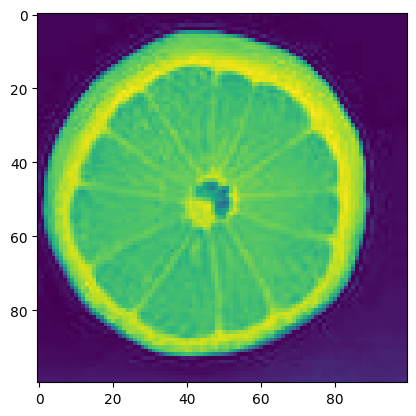

In [5]:
#new variable
img_single_channel = image[:,:,1]

#checks pixel number
print(img_single_channel.shape)

#plots new variable
plt.imshow(img_single_channel)

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


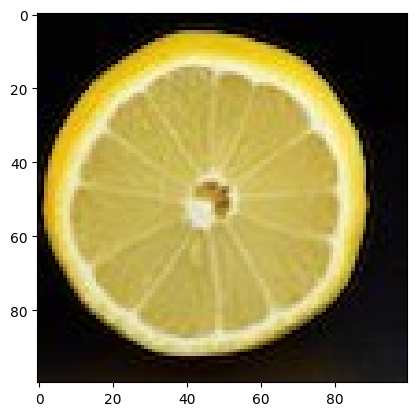

In [6]:
#creates new variable
img_average_channel = np.mean(image,axis=2)

#prints number of pixels
print(img_average_channel.shape)

#prints orginal image
plt.imshow(image)

Part 2, Question 3: I think the original image looks better because it is not green, unlike part 1.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

1. An identity matrix is a matrix whos main diagonal is comprised of 1's, and the rest of 0's. Multiplying with an identity matrix will create an inverse matrix

In [7]:
#creates variable to store the shape
avg_shape = img_average_channel.shape

#creates variable equal to the identity matrix the size of the shape.
identity_matrix = np.identity(avg_shape[0])

#prints random row, it seems that the matrix is quite large and that the diagonal is hard to keep track of
rand = np.random.randint(1,100)
print(identity_matrix[rand,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [8]:
#variable to store the number of rows in the image
rows = np.arange(100)

#shuffle the indicies
np.random.shuffle(rows)

#prints the result
print(rows)


[89 40 68 30 43 76 85 33  6 80 19 55 66 95 42  4  2 77 56 75  9 62  1  5
 16 99 18 61 65 21 57 48 25 64  3 11 92 49 79 59 47 73  7 46 53 39 82 28
 22 26 36 17 60 98 20 81 12 67 23 70 45 78 91 52 35 29 74 32 97 63 27 96
 13 90 83 87 10 93 69 38  0  8 50 72 44 94 84 54 14 15 31 24 71 86 34 51
 88 37 41 58]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [16]:
#creates new matrix
T = identity_matrix[rows]

#2. Matrix T is the identity matrix that has been reordered according to the rows of the actual image. This will allow us to multiply it with the

#prints the shape, which is the same as identity_matrix and img_average_channel
print(T.shape)

(100, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

(100, 100)


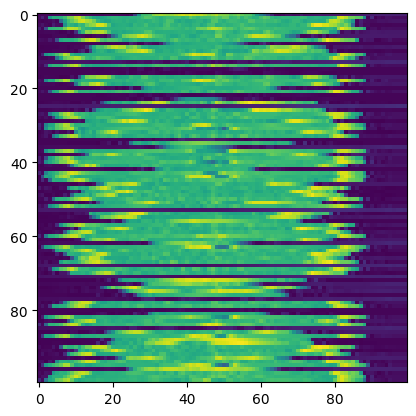

In [23]:
#matrix multiplication
transformed_image = T@img_average_channel

#the shape of the result is the same as the orginal image
print(transformed_image.shape)

#plots transformed_image
plt.imshow(transformed_image)

The transformation is putting horizontal lines through the original image. The "horizontal lines" are actually the rows that we scrambled when multiplying the matrix T by the img_avg_channel matrix to create the transformed image above.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

We can check if a matrix T is invertible if its determinant does not equal 0.

1.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


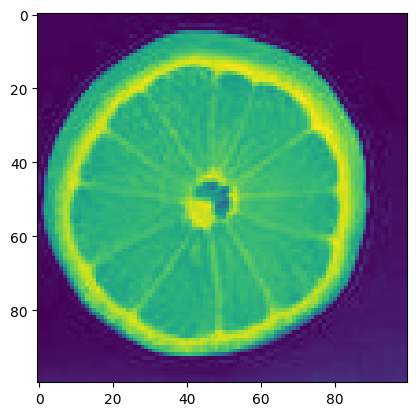

In [32]:
#the determinant of the matrix T is 1, therefore the matrix is invertible.
print(np.linalg.det(T))

Tinv = np.linalg.inv(T)
print(Tinv)

#unscrambled the image proving that the inverse of matrix T works.
unscrambled = Tinv @ transformed_image
plt.imshow(unscrambled)





## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

[38 67 39 72 79 20 36 18 26 61 43 96 29 95 64 10 59 98 41 70  3 30  7 66
 62 54 65 63 13 86 97 19 71 31 87  0  5 51 74 28 52 53 47  2 68 69 92 77
 35 11 91 73 15 99 17 55 90  4 16 34 88 75 83 50 93 23 14 45 12 94 44 21
 60 82 25 84 78 37  1 27 81 32 80 33 48 24 49 56 22 89 58 85 42  9 40 76
  6  8 46 57]


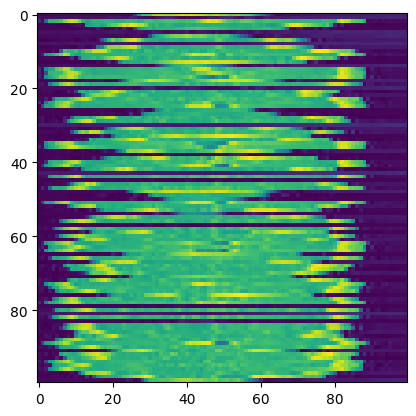

In [52]:
#create array for columns and shuffle it
col = np.arange(100)
np.random.shuffle(col)
print(col)

#create new matrix T2 that reorders both the rows and columns this time
T2= identity_matrix[rows][:,col]

#multiply T2 by the img_average_channel matrix to scramble, and then plot shows scrambled result
trans_img2 = T2 @ img_average_channel
plt.imshow(trans_img2)


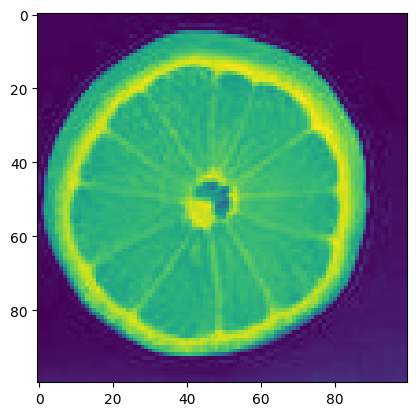

In [53]:
#inverse of T2
T2inv = np.linalg.inv(T2)

#unscrambles T2 and plots original image
unscram2 = T2inv @ trans_img2
plt.imshow(unscram2)
